# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [243]:
#Import libraries for extracting data from website and create a dataframe
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests 

In [244]:
# Let's create reviews and stars lists to get data from the website
reviews = []
stars = []

for i in range(1, 70):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=50")
    soup = BeautifulSoup(page.content, "html.parser")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_="rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

Error on page 61
Error on page 64
Error on page 64
Error on page 69


In [245]:
#Let's check length of date,reviews,country and stars because it is import before creating a dataframe
len(reviews),len(stars)

(3450, 3519)

In [246]:
#Let's make stars columns in the same size with others columns to create a dataframe otherwise we can not create
stars=stars[:len(reviews)]

In [247]:
# It is time to set up a dictionary to create the DataFrame
df = {
    "review": reviews,
    "star_rating": stars
   
}

# Create the DataFrame
df = pd.DataFrame(df)

In [248]:
#First 5 rows of data
df.head()

,review,star_rating
0,✅ Trip Verified | Good domestic flight operat...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,Not Verified | Failed at all basic travel fund...,10
2,✅ Trip Verified | They lost my baggage in a v...,1
3,✅ Trip Verified | Late boarding led to a one ...,1
4,✅ Trip Verified | As usual the flight is delay...,1


## Convert the dataset to csv format to work on it.

In [ ]:
df.to_csv('BA_reviews.csv', index=False)

## Data Cleaning

In [1]:
#Import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

Prior to conducting the dataset analysis, we must examine the dataset columns as it may be necessary to perform cleaning.

In [2]:
#Read the file
df=pd.read_csv('BA_reviews.csv')

In [3]:
#First 5 rows of dataset
df.head()

,review,star_rating
0,✅ Trip Verified | Terrible Experience with Bri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,✅ Trip Verified | An airline that lives in the...,1
2,✅ Trip Verified | Check-in Desk rude and dism...,1
3,✅ Trip Verified | I chose British Airways espe...,2
4,Not Verified | I booked Premium Economy from I...,1


In [4]:
#Star rating column of dataset 
df['star_rating'].value_counts()

1                                797
2                                399
3                                385
8                                334
10                               285
9                                283
7                                279
4                                235
5                                213
6                                169
\n\t\t\t\t\t\t\t\t\t\t\t\t\t5     68
None                               3
Name: star_rating, dtype: int64

In [4]:
# Let's clean the 'stars' column by removing '\t' and '\n'
df['star_rating'] = df['star_rating'].str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
# Let's drop rows where the value of 'stars' is "None"
df.drop(df[df['star_rating'] == "None"].index, axis=0, inplace=True)

In [33]:
#Types of dataset columns
df.dtypes

review         object
star_rating    object
dtype: object

In [5]:
#Star rating column is in an object format. We need to convert it to interiger.
df['star_rating']= df['star_rating'].astype(int)

In [301]:
#Let's check again star_rating column

df.star_rating.value_counts()

1     797
2     399
3     385
8     334
10    285
9     283
5     281
7     279
4     235
6     169
Name: star_rating, dtype: int64

**The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.**

In [255]:
#First 10 rows of reviews columns

df.review.head(10)

0    ✅ Trip Verified | Terrible Experience with Bri...
1    ✅ Trip Verified | An airline that lives in the...
2    ✅ Trip Verified |  Check-in Desk rude and dism...
3    ✅ Trip Verified | I chose British Airways espe...
4    Not Verified | I booked Premium Economy from I...
5    ✅ Trip Verified | A simple story with an unfor...
6    ✅ Trip Verified |  Flight was delayed due to t...
7    Not Verified |  Fast and friendly check in (to...
8    ✅ Trip Verified |  I don't understand why Brit...
9    Not Verified |  I'm sure that BA have graduall...
Name: review, dtype: object

In [6]:
cleaned_reviews = []
lemma = WordNetLemmatizer()

for review in df.review:
    review = re.sub("[^a-zA-Z]", " ", review)
    review = review.lower()
    words = word_tokenize(review)
    words = [word for word in words if word not in set(stopwords.words("english"))]
    lemmatized_words = [lemma.lemmatize(word) for word in words]
    cleaned_review = " ".join(lemmatized_words)
    cleaned_reviews.append(cleaned_review)

In [7]:
df['cleaned_reviews'] = cleaned_reviews

In [8]:
#First 5 rows of data after cleaning reviews columns and add new columns which is called cleaned_reviews
df.head()

,review,star_rating,cleaned_reviews
0,✅ Trip Verified | Terrible Experience with Bri...,5,trip verified terrible experience british airw...
1,✅ Trip Verified | An airline that lives in the...,1,trip verified airline life past glory heading ...
2,✅ Trip Verified | Check-in Desk rude and dism...,1,trip verified check desk rude dismissive fligh...
3,✅ Trip Verified | I chose British Airways espe...,2,trip verified chose british airway especially ...
4,Not Verified | I booked Premium Economy from I...,1,verified booked premium economy inv lax via lh...


In [9]:
#Let's drop previous review column

df.drop('review',axis=1,inplace= True)

In [10]:
# Reorder the columns to have 'cleaned_reviews' as the first column
df = df[['cleaned_reviews'] + [col for col in df.columns if col != 'cleaned_reviews']]

In [11]:
# Remove the words "trip verified" and "verified"
df['cleaned_reviews'] = df['cleaned_reviews'].str.replace('trip verified', '').str.replace('verified', '')

In [12]:
#First 5 rows of dataset
df.head()

,cleaned_reviews,star_rating
0,terrible experience british airway booked fli...,5
1,airline life past glory heading future crisis...,1
2,check desk rude dismissive flight late seems ...,1
3,chose british airway especially going travel ...,2
4,booked premium economy inv lax via lhr notifi...,1


## Exploratory Data Analysis (EDA)

In [13]:
#Check Null Values in Columns
df.isnull().sum()

cleaned_reviews    0
star_rating        0
dtype: int64

In [14]:
#Types of dataset columns
df.dtypes

cleaned_reviews    object
star_rating         int32
dtype: object

In [15]:
#Shape of dataset
df.shape

(3447, 2)

**Average point of star rating column ?**

In [266]:
df.star_rating.mean()

4.6797214969538725

**What star did customers give the most ?**

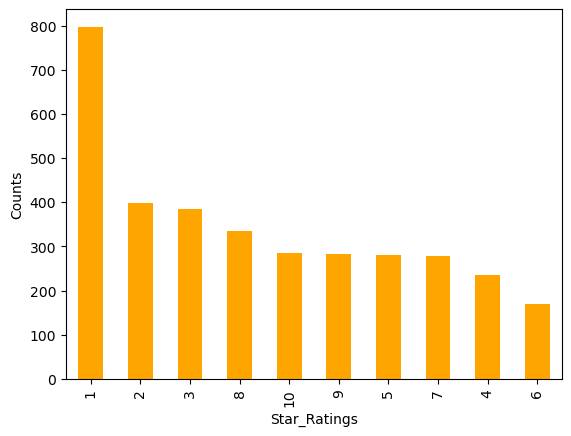

In [333]:
#Let's see the result by visualizing
df.star_rating.value_counts().plot(kind='bar',color='orange')
plt.xlabel('Star_Ratings')
plt.ylabel('Counts')
plt.show()

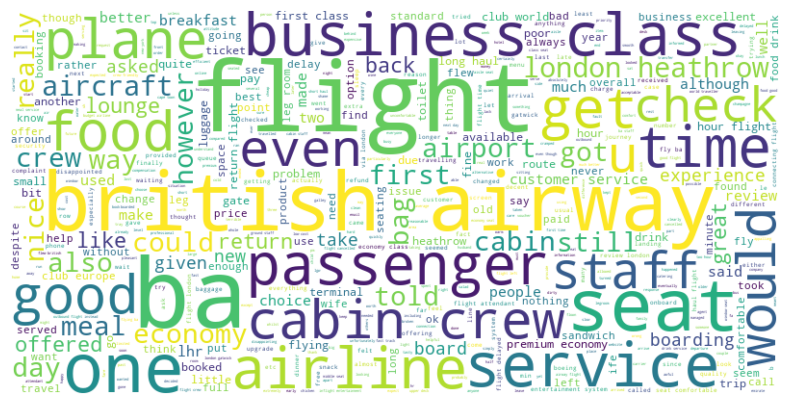

In [16]:
#Import libararies
import nltk
from nltk.corpus import stopwords

# Combine all cleaned_reviews into a single string
reviews = " ".join(df['cleaned_reviews'])

# Set stopwords
custom_stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    max_words=500,
    stopwords=custom_stopwords,
    background_color='white'
).generate(reviews)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

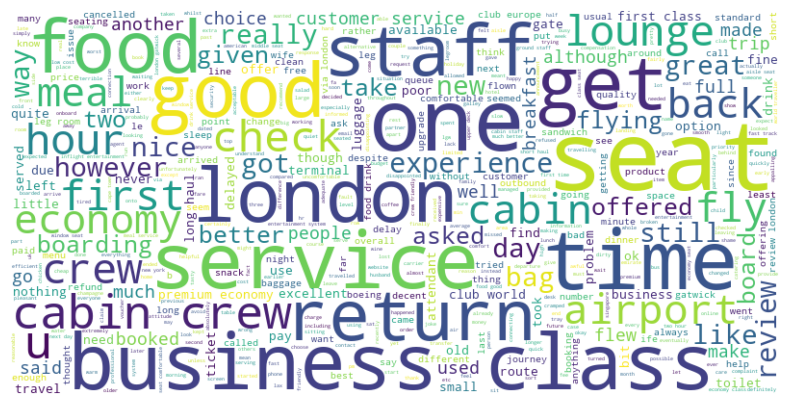

In [17]:
#Import libararies
import nltk
from nltk.corpus import stopwords

# Combine all cleaned_reviews into a single string
reviews = " ".join(df['cleaned_reviews'])

# Set stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["would","ba","flight", "lhr","british","airway", "airline","plane", "told","also","passenger","wife"
                 "london", "heathrow", "aircraft", "could","even", "would"])


# Generate and display the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    max_words=500,
    stopwords=custom_stopwords,
    background_color='white'
).generate(reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Which words are used more often?

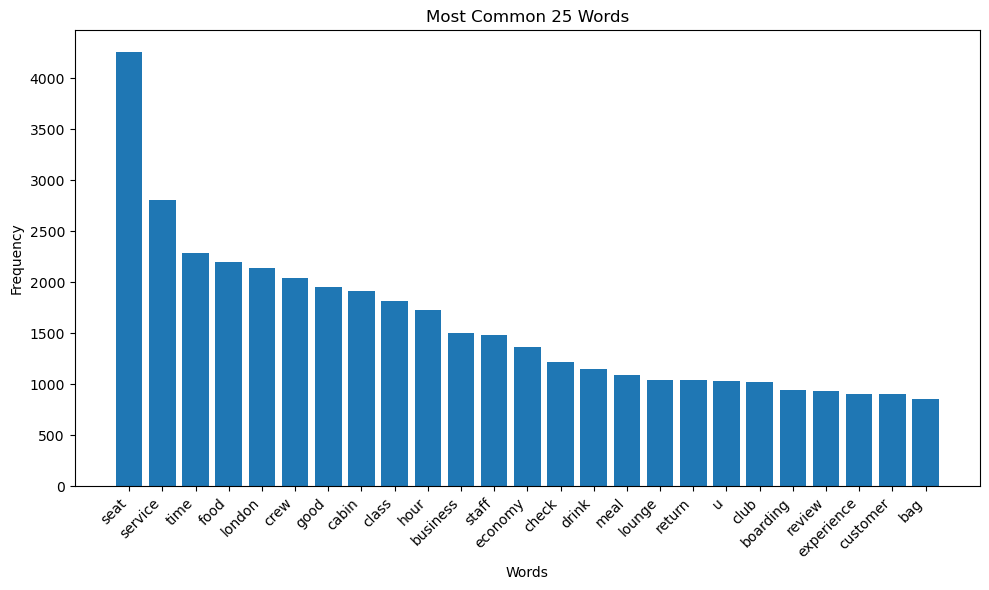

In [18]:
#Import libararies
from collections import Counter
from sklearn.feature_extraction import text

# Combine all cleaned_reviews into a single string
reviews = " ".join(df['cleaned_reviews'])

# Set stopwords
custom_stopwords = text.ENGLISH_STOP_WORDS.union(["would","ba","flight", "lhr","british","airway", "airline","plane", "told","also","passenger","wife"
                 "london", "heathrow", "aircraft", "could","even", "would"])

# Preprocess the reviews
words = reviews.split()
filtered_words = [word for word in words if word not in custom_stopwords]

# Get the most common 25 words
word_counter = Counter(filtered_words)
most_common_words = word_counter.most_common(25)

# Extract words and their frequencies for visualization
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common 25 Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Using WordCloud, we conducted an analysis to identify the terms utilized by customers when expressing their feedback regarding British Airways. However, discerning the sentiment associated with these terms, whether positive or negative, necessitates employing word frequency and n-gram analysis.

## Word Frequency analysis in conjunction with N-gram

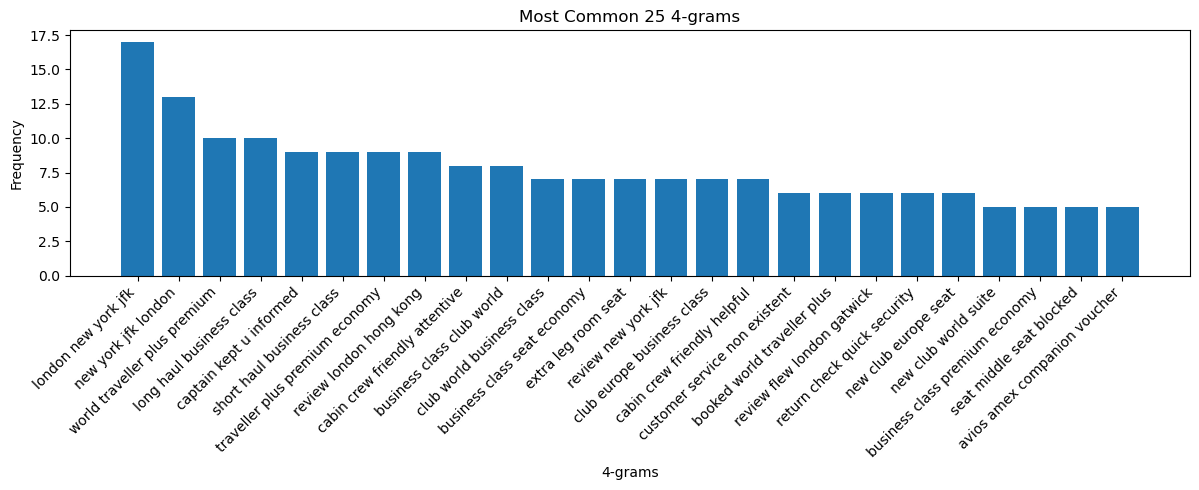

In [25]:
#Import libararies
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter
from nltk.util import ngrams


# Combine all cleaned_reviews into a single string
reviews = " ".join(df['cleaned_reviews'])

# Set stopwords
custom_stopwords = text.ENGLISH_STOP_WORDS.union(["would","ba","flight", "lhr","british","airway", "airline","plane", "told","also","passenger","wife"
                 "london", "heathrow", "aircraft", "could","even", "would"])

# Preprocess the reviews
words = reviews.lower().split()
filtered_words = [word for word in words if word not in custom_stopwords]

# N-gram analysis for 4-grams
n = 4  # Set n to 4 for 4-grams
n_grams = list(ngrams(filtered_words, n))
n_gram_counter = Counter(n_grams)
most_common_n_grams = n_gram_counter.most_common(25)

# Extract N-grams and their frequencies for visualization
n_gram_strings = [' '.join(gram) for gram, _ in most_common_n_grams]
n_gram_frequencies = [count for _, count in most_common_n_grams]

# Create a bar chart for 4-gram frequency
plt.figure(figsize=(12, 5))
plt.bar(n_gram_strings, n_gram_frequencies)
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequency')
plt.title(f'Most Common 25 {n}-grams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Let's rate the reviews based on star_rating column

Bad reviews : 1-4 stars

Good reviews : 5-7 stars

Great reviews : 8-10 stars

In [33]:
# Define a function to get frequency distribution of n-grams
def get_freq_dist_ngrams(text, n, top_n):
    words = word_tokenize(text)
    n_grams = ngrams(words, n)
    ngram_freq = Counter(n_grams)
    return ngram_freq.most_common(top_n)

In [34]:
bad_reviews = df[df.star_rating.isin([1, 2, 3, 4])]
good_reviews = df[df.star_rating.isin([5, 6])]
great_reviews = df[df.star_rating.isin([7, 8, 9, 10])]

reviews_1_4 = " ".join(bad_reviews['cleaned_reviews'])
reviews_5_6 = " ".join(good_reviews['cleaned_reviews'])
reviews_7_10 = " ".join(great_reviews['cleaned_reviews'])

# Split the text of all reviews into a list of words for each rating group
words_1_4 = reviews_1_4.split(" ")
words_5_6 = reviews_5_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

**Reviews for 1-4 star ratings**

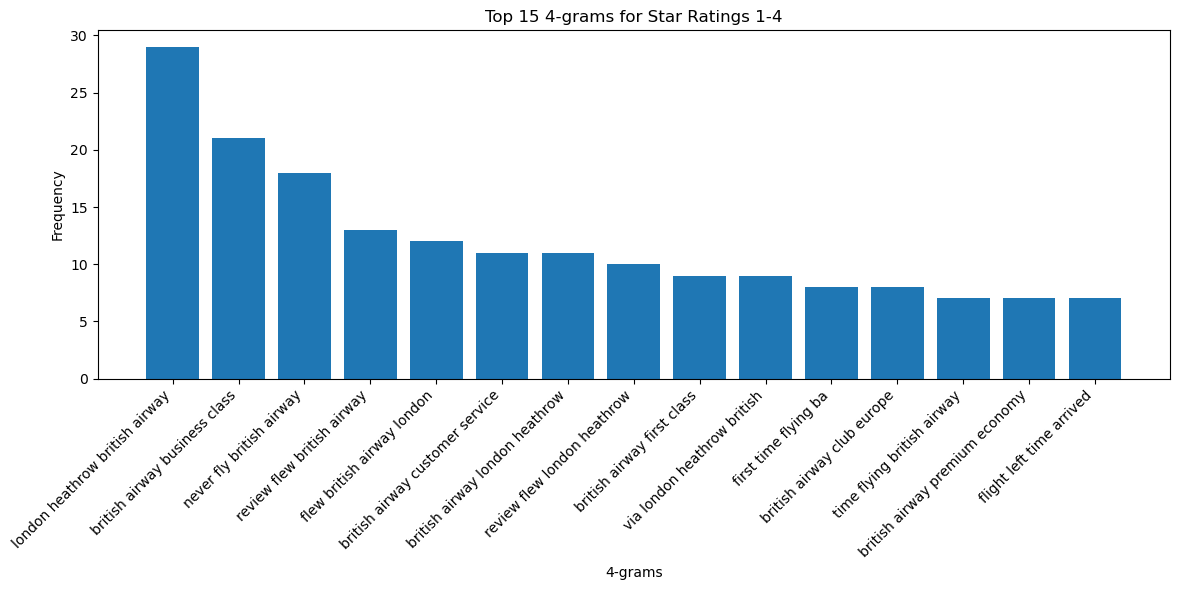

In [35]:
# Get the top 15 4-grams for ratings 1-4
top_ngrams_1_4 = get_freq_dist_ngrams(reviews_1_4, n=4, top_n=15)

# Extract 4-grams and frequencies for visualization
ngram_labels = [" ".join(ngram) for ngram, _ in top_ngrams_1_4]
ngram_frequencies = [freq for _, freq in top_ngrams_1_4]

# Create a bar chart for 4-gram frequency
plt.figure(figsize=(12, 6))
plt.bar(ngram_labels, ngram_frequencies)
plt.xlabel('4-grams')
plt.ylabel('Frequency')
plt.title('Top 15 4-grams for Star Ratings 1-4')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reviews for 5-6 star ratings**

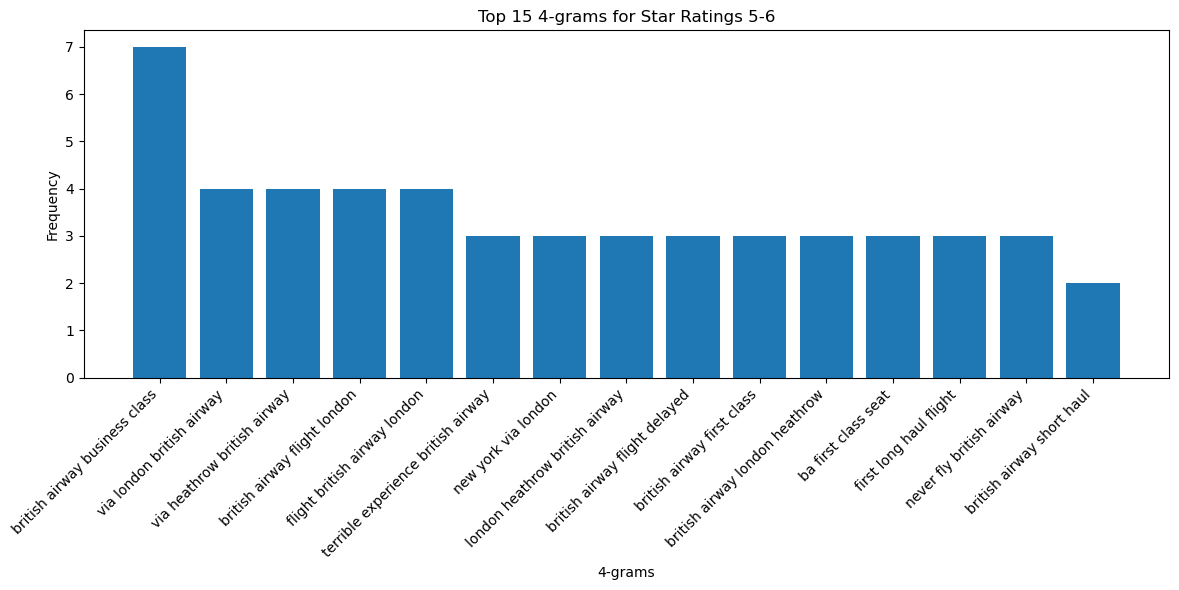

In [36]:
# Get the top 15 4-grams for ratings 5-6
top_ngrams_5_6 = get_freq_dist_ngrams(reviews_5_6, n=4, top_n=15)

# Extract 4-grams and frequencies for visualization
ngram_labels = [" ".join(ngram) for ngram, _ in top_ngrams_5_6]
ngram_frequencies = [freq for _, freq in top_ngrams_5_6]

# Create a bar chart for 4-gram frequency
plt.figure(figsize=(12, 6))
plt.bar(ngram_labels, ngram_frequencies)
plt.xlabel('4-grams')
plt.ylabel('Frequency')
plt.title('Top 15 4-grams for Star Ratings 5-6')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reviews for 7-10 star ratings**

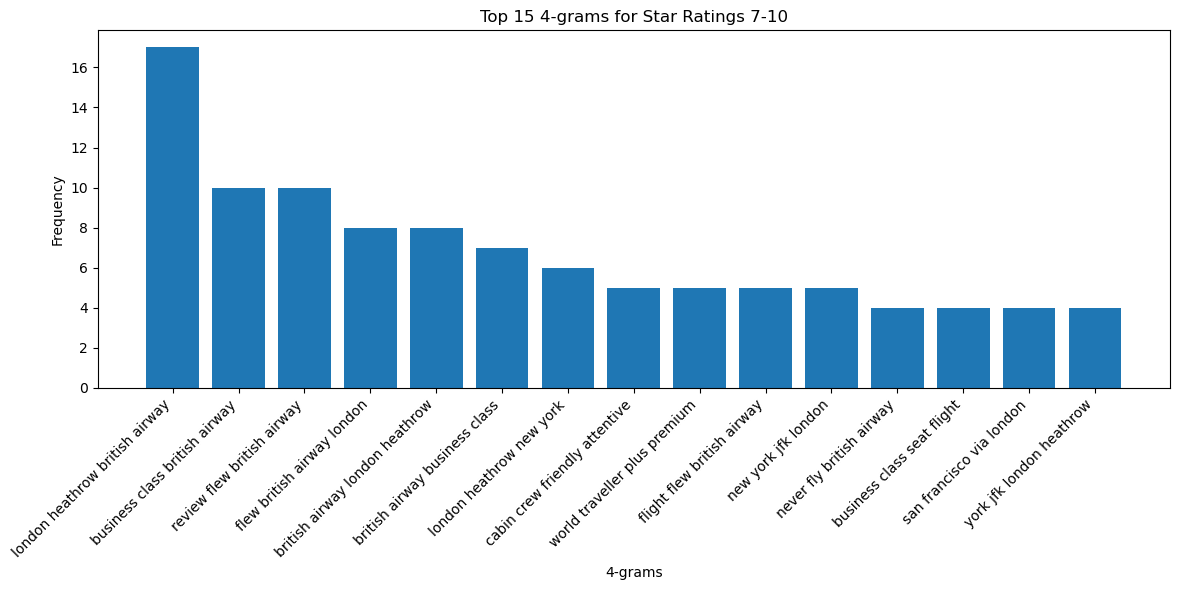

In [37]:
# Get the top 15 4-grams for ratings 7-10
top_ngrams_7_10 = get_freq_dist_ngrams(reviews_7_10, n=4, top_n=15)

# Extract 4-grams and frequencies for visualization
ngram_labels = [" ".join(ngram) for ngram, _ in top_ngrams_7_10]
ngram_frequencies = [freq for _, freq in top_ngrams_7_10]

# Create a bar chart for 4-gram frequency
plt.figure(figsize=(12, 6))
plt.bar(ngram_labels, ngram_frequencies)
plt.xlabel('4-grams')
plt.ylabel('Frequency')
plt.title('Top 15 4-grams for Star Ratings 7-10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We are going to employ the textblob library to ascertain whether the text carries a negative or positive sentiment and to what degree.

In [38]:
from textblob import TextBlob

# Create a function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis function to each review and add polarity column
df['polarity'] = df['cleaned_reviews'].apply(analyze_sentiment)

# Count positive comments within specific polarity score ranges
positive_comments_range_1 = df[(df['polarity'] > -0.2) & (df['polarity'] < 0.2)].shape[0]
positive_comments_range_2 = df[(df['polarity'] > -0.1) & (df['polarity'] < 0.1)].shape[0]

print(f"{positive_comments_range_1} number of reviews between -0.2 and 0.2 polarity score")
print(f"{positive_comments_range_2} number of reviews between -0.1 and 0.1 polarity score")

2331 number of reviews between -0.2 and 0.2 polarity score
1358 number of reviews between -0.1 and 0.1 polarity score


The polarity score is assigned within the range of -1 to 1, and when the value approaches -1, it indicates a negative review, while the opposite holds true for positive values. By setting a threshold, where reviews with a polarity greater than 0.2 are classified as positive and those less than -0.2 are labeled as negative, we end up with 2331 reviews falling within the neutral range. To further refine this pool of neutral reviews, let's employ an even narrower threshold of 0.1.

We'll explore an alternative approach for labeling reviews as positive or negative. In this case, we will utilize the VADER algorithm from the nltk library.

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a function to get sentiment label
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis and get sentiment label for each review
df['vader_scores'] = df['cleaned_reviews'].apply(lambda text: sia.polarity_scores(text)['compound'])
df['sentiment_label'] = df['vader_scores'].apply(get_sentiment_label)

In [40]:
#Let's count positive and negative values
sentiment_counts = df.sentiment_label.value_counts()
print(sentiment_counts)

Positive    2307
Negative    1120
Neutral       20
Name: sentiment_label, dtype: int64


## Topic Modelling (LDA)

Our reviews have been preprocessed and cleaned. However, to facilitate topic modeling, we need to create word embeddings or a matrix of words. To achieve this, we will employ the count vectorizer method from the sklearn library.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer to convert text data to document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_reviews'])

# Apply Latent Dirichlet Allocation (LDA) model
num_topics = 10  # Number of topics to identify
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(dtm)

# Create a DataFrame to store topic information
topic_df = pd.DataFrame(columns=['Topic', 'Top Words'])

# Print topics and their associated words
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_df.loc[topic_idx] = [f"Topic {topic_idx}", ', '.join(top_words)]

# Associate each document with its most probable topic
topic_probabilities = lda.transform(dtm)
df['topic'] = topic_probabilities.argmax(axis=1)

In [44]:
topic_df

,Topic,Top Words
0,Topic 0,"ba, service, flight, airline, cost, review, st..."
1,Topic 1,"flight, check, hour, boarding, time, bag, minu..."
2,Topic 2,"flight, ba, hour, day, told, london, airway, b..."
3,Topic 3,"flight, good, ba, lhr, food, seat, crew, servi..."
4,Topic 4,"flight, staff, class, food, business, attendan..."
5,Topic 5,"flight, good, service, drink, lounge, food, cr..."
6,Topic 6,"flight, lounge, club, ba, crew, time, good, eu..."
7,Topic 7,"seat, class, business, economy, ba, flight, fo..."
8,Topic 8,"flight, meal, crew, cabin, food, service, brit..."
9,Topic 9,"ba, flight, british, airway, airline, seat, cu..."


## Topic Modeling (NMF)

In [46]:
#Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF


# Create a CountVectorizer to convert text data to document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_reviews'])

# Apply Non-Negative Matrix Factorization (NMF) model
number_of_topics = 3
nmf_model = NMF(n_components=number_of_topics, random_state=0)
nmf_model.fit(dtm)

# Get the feature names (words) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Initialize dictionaries to store topic words and weights
topic_words = {}
topic_weights = {}

# Populate dictionaries with topic words and weights
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_indices = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = [round(topic[i], 1) for i in top_words_indices]
    
    topic_words[f"Topic {topic_idx} words"] = top_words
    topic_weights[f"Topic {topic_idx} weights"] = top_weights

# Create DataFrames for topic words and topic weights
topic_words_df = pd.DataFrame(topic_words)
topic_weights_df = pd.DataFrame(topic_weights)

# Combine both DataFrames
topics_and_weights_df = pd.concat([topic_words_df, topic_weights_df], axis=1)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [47]:
topics_and_weights_df

,Topic 0 words,Topic 1 words,Topic 2 words,Topic 0 weights,Topic 1 weights,Topic 2 weights
0,flight,seat,ba,12.9,8.6,10.7
1,hour,class,service,2.6,2.9,2.4
2,time,cabin,airline,2.2,2.5,1.9
3,airway,food,staff,2.1,2.3,1.3
4,british,good,customer,2.1,2.3,1.2
5,london,business,lounge,2.1,2.3,1.1
6,heathrow,crew,year,1.3,2.2,1.0
7,service,economy,time,1.3,2.1,1.0
8,crew,service,fly,1.1,1.7,1.0
9,day,club,passenger,1.0,1.4,0.9
